In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns

# set random seed
SEED = 321
np.random.seed(SEED)

url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
sns.set_context("talk", font_scale=0.9)

In [4]:
# filter 4 largest cities
filter_four = df['SizeRank'] < 4
filter_four.head()

0     True
1     True
2     True
3     True
4    False
Name: SizeRank, dtype: bool

In [5]:
# Apply the filter to create a dataframe
df_filtered = df[filter_four]
df_filtered

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [6]:
melted = pd.melt(df_filtered.drop(columns=['RegionID','RegionType','StateName',
                                      'SizeRank',     'Metro','CountyName']),
                 id_vars=['RegionName', 'State'],
                var_name="Date")
melted

,RegionName,State,Date,value
0,New York,NY,2000-01-31,253690.0
1,Los Angeles,CA,2000-01-31,234181.0
2,Houston,TX,2000-01-31,109068.0
3,Chicago,IL,2000-01-31,166139.0
4,New York,NY,2000-02-29,255517.0
...,...,...,...,...
1087,Chicago,IL,2022-08-31,315587.0
1088,New York,NY,2022-09-30,781622.0
1089,Los Angeles,CA,2022-09-30,966595.0
1090,Houston,TX,2022-09-30,272639.0


In [7]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   State       1092 non-null   object        
 2   Date        1092 non-null   datetime64[ns]
 3   value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.2+ KB


In [8]:
melted = melted.set_index("Date")
melted

,RegionName,State,value
Date,,,
2000-01-31,New York,NY,253690.0
2000-01-31,Los Angeles,CA,234181.0
2000-01-31,Houston,TX,109068.0
2000-01-31,Chicago,IL,166139.0
2000-02-29,New York,NY,255517.0
...,...,...,...
2022-08-31,Chicago,IL,315587.0
2022-09-30,New York,NY,781622.0
2022-09-30,Los Angeles,CA,966595.0


In [9]:
ts = melted.groupby('RegionName').resample("M").mean()
ts

value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

In [10]:
ts.head().index

MultiIndex([('Chicago', '2000-01-31'),
            ('Chicago', '2000-02-29'),
            ('Chicago', '2000-03-31'),
            ('Chicago', '2000-04-30'),
            ('Chicago', '2000-05-31')],
           names=['RegionName', 'Date'])

# Part 2

In [11]:
unstacked=ts.unstack(level=0)
unstacked

value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [14]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

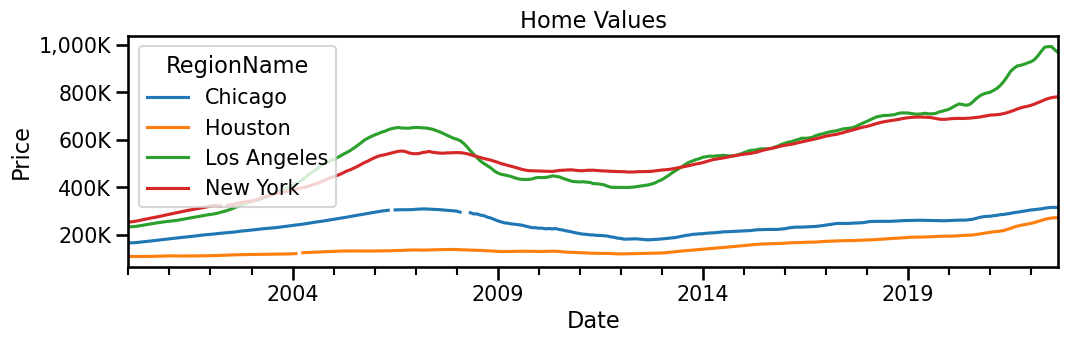

In [15]:
ax=unstacked['value'].plot(figsize=(12,3),title='Home Values')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(fmt_thous)


## Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [16]:
unstacked.loc[pd.IndexSlice['2008'],:].mean()

       RegionName 
value  Chicago        284151.400000
       Houston        135163.083333
       Los Angeles    535684.000000
       New York       530794.166667
dtype: float64

### The city with the highest typical home value at the end of 2008 was Los Angeles

### The city with the lowest typical home value at the end of 2008 was Houston

## Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [17]:
diff=unstacked.diff()
diff

value                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2000-01-31     NaN     NaN         NaN      NaN
2000-02-29   397.0    11.0       220.0   1827.0
2000-03-31   832.0  -201.0      1112.0   1690.0
2000-04-30  1458.0     3.0      2076.0   3103.0
2000-05-31  1673.0   -47.0      2524.0   2894.0
...            ...     ...         ...      ...
2022-05-31  2838.0  4457.0     17223.0   6476.0
2022-06-30  2176.0  3343.0      1946.0   5147.0
2022-07-31  1247.0  2158.0       293.0   3748.0
2022-08-31  -323.0  1341.0    -14434.0   2268.0
2022-09-30  -158.0   239.0    -11601.0   1662.0

[273 rows x 4 columns]

In [18]:
diff.loc[pd.IndexSlice['11/01/2008':'12/01/2008'],:]

value                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-11-30 -3790.0  -942.0     -9074.0  -3281.0

### Home Value Change From November 2008 to December 2008
Chicago: -$3,790.00

Houston: -$942.00

Los Angeles: -$9,074.00

New York: -$3,281.00